In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('dfs/220722T1546_pubsub_data.pkl', 'rb') as f:
    pubsub_df = pickle.load(f)

In [2]:
pubsub_df

,i_sub,t_sub,i_pub,t_pub,n_channels
i,,,,,
0,0,256302156067511,0,256302155663295,128
1,1,256302156873087,1,256302156661584,128
2,2,256302157928014,2,256302157657952,128
3,3,256302158894896,3,256302158656934,128
4,4,256302159884025,4,256302159656617,128
...,...,...,...,...,...
299995,299995,256602880714752,299995,256602880557489,128
299996,299996,256602881724405,299996,256602881557897,128
299997,299997,256602882710876,299997,256602882557812,128


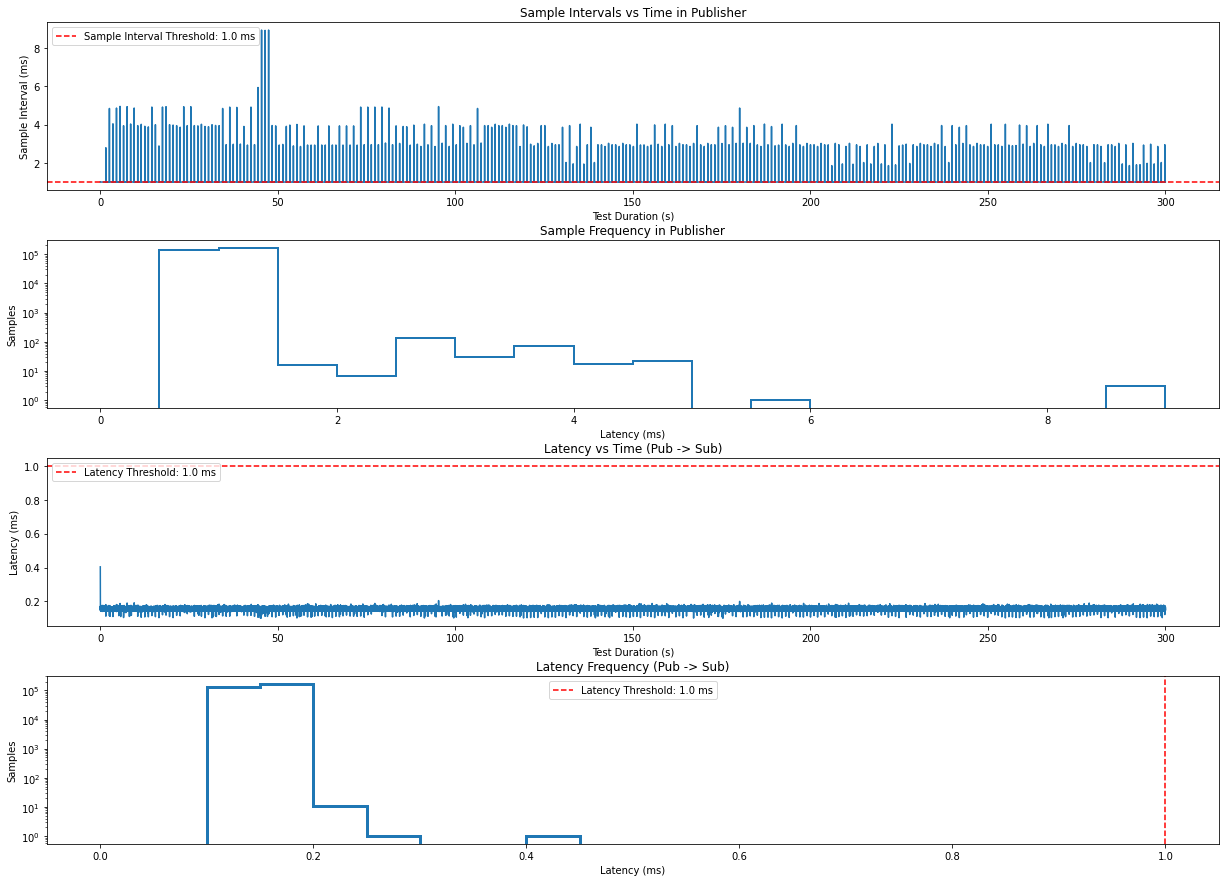

In [4]:
#Calculate Latencies and sample intervals
latencies = (pubsub_df['t_sub'] - pubsub_df['t_pub']).values / 1e6
pub_intervals = np.diff(pubsub_df['t_pub'].values) / 1e6

#Plot timing information
fig, axs = plt.subplots(4, 1, figsize=(17,12))
thres = (1 / 1000) * 1000
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Subplot 1
dur_int = np.arange(pub_intervals.shape[0]) / 1000
axs[0].plot(dur_int, pub_intervals)
axs[0].axhline(thres, color='red', linestyle='dashed', label=f'Sample Interval Threshold: {thres} ms')
axs[0].set_title('Sample Intervals vs Time in Publisher')
axs[0].set_xlabel('Test Duration (s)')
axs[0].set_ylabel('Sample Interval (ms)')
axs[0].legend(loc='upper left')

# Subplot 2
step_int = 0.5
bins = np.arange(np.ceil(pub_intervals.max()) + step_int, step=step_int)
axs[1].hist(pub_intervals, bins=bins, histtype='step', linewidth=2)
axs[1].set_title('Sample Frequency in Publisher')
axs[1].set_xlabel('Latency (ms)')
axs[1].set_ylabel('Samples')
axs[1].set_yscale('log')

# Subplot 3
dur_lat = np.arange(latencies.shape[0]) / 1000
axs[2].plot(dur_lat, latencies)
axs[2].axhline(thres, color='red', linestyle='dashed', label=f'Latency Threshold: {thres} ms')
axs[2].set_title('Latency vs Time (Pub -> Sub)')
axs[2].set_xlabel('Test Duration (s)')
axs[2].set_ylabel('Latency (ms)')
axs[2].legend(loc='upper left')

# Subplot 4
step_lat = 0.05
bins = np.arange(np.ceil(latencies.max()) + step_lat, step=step_lat)
axs[3].hist(latencies, bins=bins, histtype='step', linewidth=3)
axs[3].set_title('Latency Frequency (Pub -> Sub)')
axs[3].axvline(thres, color='red', linestyle='dashed', label=f'Latency Threshold: {thres} ms')
axs[3].set_xlabel('Latency (ms)')
axs[3].set_ylabel('Samples')
axs[3].set_yscale('log')
axs[3].legend(loc='upper center')